# Understanding Data
Understanding Data adalah tahap awal dalam Knowledge Discovery in Database (KDD) atau data mining yang berfokus pada eksplorasi dan pemahaman karakteristik data sebelum dilakukan analisis lebih lanjut. Proses ini mencakup pemeriksaan struktur, pola, kualitas, serta hubungan dalam data untuk memastikan bahwa data yang digunakan relevan, bersih, dan siap untuk ditambang. Pemahaman yang baik terhadap data akan meningkatkan akurasi dan efektivitas dalam proses analisis serta pengambilan keputusan.


## Pengumpulan data
Pada tahap ini, data dikumpulkan dari berbagai sumber dan disimpan dalam platform seperti Aiven.io, yang memungkinkan integrasi dari berbagai database. Proses pengumpulan data harus memastikan bahwa data yang diperoleh relevan, akurat, dan sesuai dengan tujuan analisis. Validasi dan pemilihan data yang tepat sangat penting agar hasil analisis nantinya dapat memberikan wawasan yang valid dan bermanfaat.


## Instalasi Paket untuk MySQL dan PostgreSQL
Instalasi paket untuk MySQL dan PostgreSQL adalah proses pemasangan perangkat lunak atau library yang diperlukan untuk memungkinkan koneksi, pengelolaan, dan manipulasi database MySQL serta PostgreSQL. Paket ini biasanya mencakup driver, dependensi, serta alat bantu yang mendukung komunikasi antara aplikasi dan database. Instalasi ini penting untuk memastikan sistem dapat berinteraksi dengan database secara optimal, baik untuk menjalankan query, mengelola data, maupun melakukan analisis lebih lanjut.

In [ ]:
!pip install pymysql

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 2.6 MB/s eta 0:00:00


In [ ]:
!pip install psycopg2-binary

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 16.0 MB/s eta 0:00:00


In [ ]:
!pip install pandas tabulate

## Koneksi ke Database Mysql dan PosgreSQL melalui dari aiven.io

### Koneksi ke PosgreSQL dan menampilkan datanya

In [ ]:
import psycopg2
import pandas as pd
from tabulate import tabulate

# Koneksi ke database PostgreSQL
PG_HOST = "posgesqlpendata23-175-posgresqlpendata23-175.h.aivencloud.com"
PG_PORT = "17047"
PG_NAME = "defaultdb"
PG_USER = "avnadmin"
PG_PASS = "AVNS_XfGwRG6_6e5BdqZXovg"

try:
    # Membuat koneksi
    conn = psycopg2.connect(
        host=PG_HOST,
        port=PG_PORT,
        dbname=PG_NAME,
        user=PG_USER,
        password=PG_PASS,
        sslmode="require"
    )
    cur = conn.cursor()

    # Menjalankan query
    cur.execute("SELECT * FROM irisposgre.posgre;")  # Ganti dengan nama skema & tabel yang benar
    rows = cur.fetchall()

    # Mengambil nama kolom
    col_names = [desc[0] for desc in cur.description]

    # Menampilkan hasil dalam bentuk tabel
    df = pd.DataFrame(rows, columns=col_names)
    print(tabulate(df, headers="keys", tablefmt="psql"))

except Exception as e:
    print("Error:", e)

finally:
    # Menutup koneksi
    if cur:
        cur.close()
    if conn:
        conn.close()


+-----+------+-----------------+----------------+---------------+
|     |   id | Class           |   sepal length |   sepal width |
|-----+------+-----------------+----------------+---------------|
|   0 |    1 | Iris-setosa     |            5.1 |           3.5 |
|   1 |    2 | Iris-setosa     |            4.9 |           3   |
|   2 |    3 | Iris-setosa     |            4.7 |           3.2 |
|   3 |    4 | Iris-setosa     |            4.6 |           3.1 |
|   4 |    5 | Iris-setosa     |            5   |           3.6 |
|   5 |    6 | Iris-setosa     |            5.4 |           3.9 |
|   6 |    7 | Iris-setosa     |            4.6 |           3.4 |
|   7 |    8 | Iris-setosa     |            5   |           3.4 |
|   8 |    9 | Iris-setosa     |            4.4 |           2.9 |
|   9 |   10 | Iris-setosa     |            4.9 |           3.1 |
|  10 |   11 | Iris-setosa     |            5.4 |           3.7 |
|  11 |   12 | Iris-setosa     |            4.8 |           3.4 |
|  12 |   

### Koneksi ke MySQL dan menampilkan datanya

In [ ]:
import pymysql
import pandas as pd
from tabulate import tabulate

# Konfigurasi koneksi ke database MySQL
DB_HOST = "mysql-pendata23-175-mysqlpendata23-175.g.aivencloud.com"
DB_PORT = 17974
DB_NAME = "defaultdb"
DB_USER = "avnadmin"
DB_PASS = "AVNS_756YWhIqpe1WzSKsGNx"

try:
    # Membuat koneksi ke MySQL
    conn = pymysql.connect(
        host=DB_HOST,
        port=DB_PORT,
        user=DB_USER,
        password=DB_PASS,
        database=DB_NAME,
        cursorclass=pymysql.cursors.DictCursor  # Mengembalikan hasil sebagai dictionary
    )
    cur = conn.cursor()

    # Menjalankan query SQL
    query = "SELECT * FROM irismysql.flowers;"  # Sesuaikan dengan nama tabel
    cur.execute(query)
    rows = cur.fetchall()

    # Jika tabel kosong
    if not rows:
        print("Tabel kosong, tidak ada data untuk ditampilkan.")
    else:
        # Mengubah hasil query menjadi DataFrame pandas
        df = pd.DataFrame(rows)

        # Menampilkan 3 data awal, titik-titik di tengah, dan 3 data akhir
        df_selected = pd.concat([df.head(3), pd.DataFrame([["..."] * len(df.columns)], columns=df.columns), df.tail(3)])

        # Menampilkan tabel dengan format psql
        print(tabulate(df_selected, headers="keys", tablefmt="psql", showindex=False))

except Exception as e:
    print("Error:", e)

finally:
    # Menutup koneksi ke database
    if cur:
        cur.close()
    if conn:
        conn.close()


+------+----------------+----------------+---------------+
| id   | class          | petal length   | petal width   |
|------+----------------+----------------+---------------|
| 1    | Iris-setosa    | 1.4            | 0.2           |
| 2    | Iris-setosa    | 1.4            | 0.2           |
| 3    | Iris-setosa    | 1.3            | 0.2           |
| ...  | ...            | ...            | ...           |
| 148  | Iris-virginica | 5.2            | 2.0           |
| 149  | Iris-virginica | 5.4            | 2.3           |
| 150  | Iris-virginica | 5.1            | 1.8           |
+------+----------------+----------------+---------------+


## Sampling data
Sampling data adalah proses pemilihan subset dari keseluruhan dataset untuk dianalisis tanpa harus memproses seluruh data. Teknik ini memungkinkan efisiensi dalam analisis sekaligus mempertahankan representasi yang cukup dari pola dalam data. Dalam tahap ini, data dikelompokkan berdasarkan kelas tertentu untuk memudahkan pemahaman dan visualisasi. Sebagai contoh, dalam dataset Iris, setiap jenis bunga dikategorikan dengan warna berbeda: Iris-setosa berwarna biru, Iris-versicolor berwarna merah, dan Iris-virginica berwarna hijau. Pendekatan ini membantu dalam interpretasi data serta meningkatkan efektivitas dalam analisis lebih lanjut.

## Profiling data

Profiling data adalah proses membuat ringkasan dari setiap variabel dalam dataset, termasuk jenis data, distribusi, serta kualitasnya. Tahap ini mencakup pemeriksaan struktur data, identifikasi nilai yang hilang (missing values), serta deteksi inkonsistensi sebelum data digunakan dalam analisis lebih lanjut.


### menarik data base dari PosgreSql dan Mysql menjadi 1 tabel sekaligus mengecek apakah terdapat mising value dan ketidak konsistenan ketika data digabungkan


### Menggabungkan Database dari PostgreSQL dan MySQL
Pada tahap ini, data dari PostgreSQL dan MySQL digabungkan ke dalam satu tabel. Setelah penggabungan, dilakukan pemeriksaan untuk mendeteksi adanya nilai yang hilang serta inkonsistensi data guna memastikan bahwa dataset siap untuk dianalisis secara optimal.

In [ ]:
import psycopg2
import pymysql
import pandas as pd
from tabulate import tabulate

# Koneksi PostgreSQL
PG_HOST = "posgesqlpendata23-175-posgresqlpendata23-175.h.aivencloud.com"
PG_PORT = "17047"
PG_NAME = "defaultdb"
PG_USER = "avnadmin"
PG_PASS = "AVNS_XfGwRG6_6e5BdqZXovg"

# Koneksi MySQL
DB_HOST = "mysql-pendata23-175-mysqlpendata23-175.g.aivencloud.com"
DB_PORT = 17974
DB_NAME = "defaultdb"
DB_USER = "avnadmin"
DB_PASS = "AVNS_756YWhIqpe1WzSKsGNx"

try:
    # Koneksi PostgreSQL
    conn = psycopg2.connect(
        host=PG_HOST, port=PG_PORT, dbname=PG_NAME,
        user=PG_USER, password=PG_PASS, sslmode="require"
    )
    cur = conn.cursor()

    # Ambil data dari PostgreSQL (ID, Class, Sepal Length, Sepal Width)
    cur.execute("SELECT * FROM irisposgre.posgre;")  # Sesuaikan tabel
    pg_rows = cur.fetchall()
    pg_columns = [desc[0] for desc in cur.description]
    pg_df = pd.DataFrame(pg_rows, columns=pg_columns)

    # Koneksi MySQL
    mysql_conn = pymysql.connect(
        host=DB_HOST, port=DB_PORT, user=DB_USER,
        password=DB_PASS, database=DB_NAME,
        cursorclass=pymysql.cursors.DictCursor
    )
    mysql_cur = mysql_conn.cursor()

    # Ambil data dari MySQL (ID, Petal Length, Petal Width)
    mysql_cur.execute("SELECT * FROM irismysql.flowers;")  # Sesuaikan tabel
    mysql_rows = mysql_cur.fetchall()
    mysql_df = pd.DataFrame(mysql_rows)

    # Menggabungkan kedua tabel berdasarkan ID
    combined_df = pd.merge(pg_df, mysql_df, on="id", how="inner")  # Inner join

    # Mengatur urutan kolom agar class berada di sebelah ID
    ordered_columns = ["id", "class", "sepal length", "sepal width", "petal length", "petal width"]
    combined_df = combined_df[ordered_columns]

    # Menampilkan 3 data awal, tanda "..." di tengah, dan 3 data akhir
    df_selected = pd.concat([
        combined_df.head(3),
        pd.DataFrame([["..."] * len(combined_df.columns)], columns=combined_df.columns),
        combined_df.tail(3)
    ])

    # Menampilkan hasil dalam format tabel
    print(tabulate(df_selected, headers="keys", tablefmt="psql", showindex=False))

except Exception as e:
    print("Error:", e)

finally:
    # Menutup koneksi database
    if cur:
        cur.close()
    if conn:
        conn.close()
    if mysql_cur:
        mysql_cur.close()
    if mysql_conn:
        mysql_conn.close()


+------+----------------+----------------+---------------+----------------+---------------+
| id   | class          | sepal length   | sepal width   | petal length   | petal width   |
|------+----------------+----------------+---------------+----------------+---------------|
| 1    | Iris-setosa    | 5.1            | 3.5           | 1.4            | 0.2           |
| 2    | Iris-setosa    | 4.9            | 3.0           | 1.4            | 0.2           |
| 3    | Iris-setosa    | 4.7            | 3.2           | 1.3            | 0.2           |
| ...  | ...            | ...            | ...           | ...            | ...           |
| 148  | Iris-virginica | 6.5            | 3.0           | 5.2            | 2.0           |
| 149  | Iris-virginica | 6.2            | 3.4           | 5.4            | 2.3           |
| 150  | Iris-virginica | 5.9            | 3.0           | 5.1            | 1.8           |
+------+----------------+----------------+---------------+----------------+-----

## Visualisasi Data

Visualisasi data adalah teknik dalam analisis dataset yang digunakan untuk memahami, mengeksplorasi, dan menyajikan pola dalam data secara grafis. Dengan visualisasi, pola, tren, distribusi, serta hubungan antar variabel dapat lebih mudah diidentifikasi. Penggunaan diagram, grafik, atau plot membantu mempercepat proses analisis dan mendukung pengambilan keputusan berbasis data.

## Korelasi dan Asosiasi

Korelasi dan asosiasi adalah metode untuk mengukur hubungan antara variabel dalam dataset. Korelasi berfokus pada hubungan linier antar variabel dengan menghitung koefisien korelasi, sedangkan asosiasi mengidentifikasi keterkaitan antara atribut yang mungkin tidak bersifat linier. Analisis ini bertujuan untuk memahami bagaimana satu variabel dapat memengaruhi atau berhubungan dengan variabel lainnya.

## Eksplorasi Data

Eksplorasi data adalah tahap awal dalam analisis data yang bertujuan untuk memahami karakteristik, distribusi, dan pola dalam dataset. Proses ini mencakup perhitungan statistik deskriptif seperti mean, median, modus, standar deviasi, nilai minimum, dan maksimum. Selain itu, teknik visualisasi seperti histogram dan scatter plot digunakan untuk mengidentifikasi pola awal atau tren dalam data, yang dapat membantu dalam tahap analisis lebih lanjut.

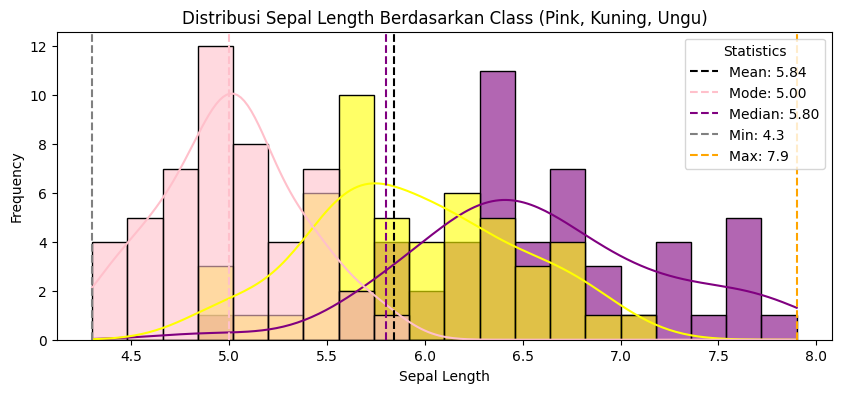

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pastikan nama kolom benar
sepal_length_col = "sepal length"  # Sesuaikan dengan nama kolom yang benar
class_col = "class"  # Sesuaikan dengan nama kolom yang benar

# Tetapkan warna khusus untuk setiap class
custom_palette = {
    "Iris-setosa": "pink",
    "Iris-versicolor": "yellow",
    "Iris-virginica": "purple"
}

# Hitung statistik dasar
mean_sepal_length = combined_df[sepal_length_col].mean()
median_sepal_length = combined_df[sepal_length_col].median()
min_sepal_length = combined_df[sepal_length_col].min()
max_sepal_length = combined_df[sepal_length_col].max()
mode_sepal_length = combined_df[sepal_length_col].mode()[0]

# Buat plot distribusi dengan warna yang sudah ditentukan
plt.figure(figsize=(10, 4))
sns.histplot(data=combined_df, x=sepal_length_col, hue=class_col, bins=20, kde=True, alpha=0.6, palette=custom_palette)

# Tambahkan garis rata-rata, median, min, dan max
plt.axvline(mean_sepal_length, color="black", linestyle="--", label=f"Mean: {mean_sepal_length:.2f}")
plt.axvline(mode_sepal_length, color="pink", linestyle="--", label=f"Mode: {mode_sepal_length:.2f}")
plt.axvline(median_sepal_length, color="purple", linestyle="--", label=f"Median: {median_sepal_length:.2f}")
plt.axvline(min_sepal_length, color="gray", linestyle="--", label=f"Min: {min_sepal_length:.1f}")
plt.axvline(max_sepal_length, color="orange", linestyle="--", label=f"Max: {max_sepal_length:.1f}")

# Tambahkan label
plt.xlabel("Sepal Length")
plt.ylabel("Frequency")
plt.title("Distribusi Sepal Length Berdasarkan Class (Pink, Kuning, Ungu)")
plt.legend(title="Statistics")

# Tampilkan plot
plt.show()


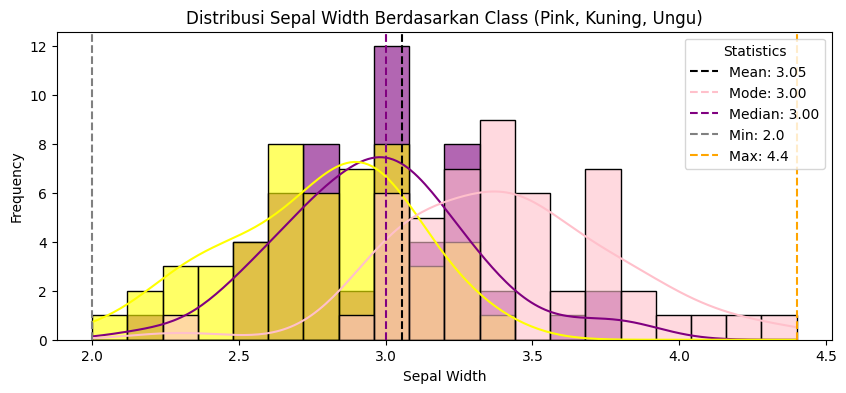

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pastikan nama kolom benar
sepal_length_col = "sepal width"  # Sesuaikan dengan nama kolom yang benar
class_col = "class"  # Sesuaikan dengan nama kolom yang benar

# Tetapkan warna khusus untuk setiap class
custom_palette = {
    "Iris-setosa": "pink",
    "Iris-versicolor": "yellow",
    "Iris-virginica": "purple"
}

# Hitung statistik dasar
mean_sepal_length = combined_df[sepal_length_col].mean()
median_sepal_length = combined_df[sepal_length_col].median()
min_sepal_length = combined_df[sepal_length_col].min()
max_sepal_length = combined_df[sepal_length_col].max()
mode_sepal_length = combined_df[sepal_length_col].mode()[0]

# Buat plot distribusi dengan warna yang sudah ditentukan
plt.figure(figsize=(10, 4))
sns.histplot(data=combined_df, x=sepal_length_col, hue=class_col, bins=20, kde=True, alpha=0.6, palette=custom_palette)

# Tambahkan garis rata-rata, median, min, dan max
plt.axvline(mean_sepal_length, color="black", linestyle="--", label=f"Mean: {mean_sepal_length:.2f}")
plt.axvline(mode_sepal_length, color="pink", linestyle="--", label=f"Mode: {mode_sepal_length:.2f}")
plt.axvline(median_sepal_length, color="purple", linestyle="--", label=f"Median: {median_sepal_length:.2f}")
plt.axvline(min_sepal_length, color="gray", linestyle="--", label=f"Min: {min_sepal_length:.1f}")
plt.axvline(max_sepal_length, color="orange", linestyle="--", label=f"Max: {max_sepal_length:.1f}")

# Tambahkan label
plt.xlabel("Sepal Width")
plt.ylabel("Frequency")
plt.title("Distribusi Sepal Width Berdasarkan Class (Pink, Kuning, Ungu)")
plt.legend(title="Statistics")

# Tampilkan plot
plt.show()


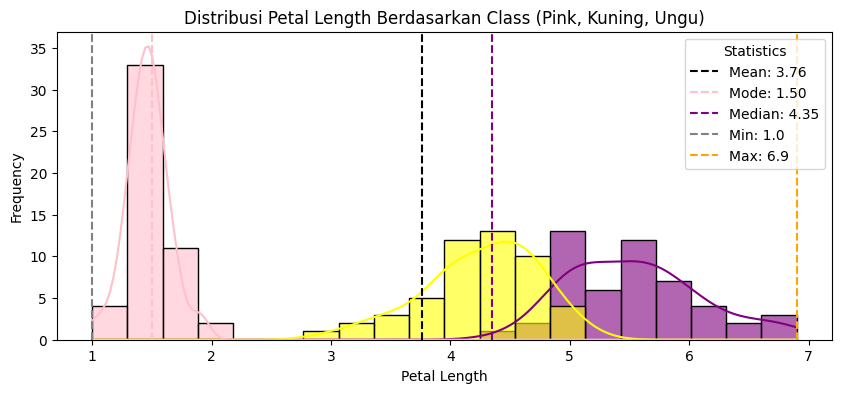

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pastikan nama kolom benar
sepal_length_col = "petal length"  # Sesuaikan dengan nama kolom yang benar
class_col = "class"  # Sesuaikan dengan nama kolom yang benar

# Tetapkan warna khusus untuk setiap class
custom_palette = {
    "Iris-setosa": "pink",
    "Iris-versicolor": "yellow",
    "Iris-virginica": "purple"
}

# Hitung statistik dasar
mean_sepal_length = combined_df[sepal_length_col].mean()
median_sepal_length = combined_df[sepal_length_col].median()
min_sepal_length = combined_df[sepal_length_col].min()
max_sepal_length = combined_df[sepal_length_col].max()
mode_sepal_length = combined_df[sepal_length_col].mode()[0]

# Buat plot distribusi dengan warna yang sudah ditentukan
plt.figure(figsize=(10, 4))
sns.histplot(data=combined_df, x=sepal_length_col, hue=class_col, bins=20, kde=True, alpha=0.6, palette=custom_palette)

# Tambahkan garis rata-rata, median, min, dan max
plt.axvline(mean_sepal_length, color="black", linestyle="--", label=f"Mean: {mean_sepal_length:.2f}")
plt.axvline(mode_sepal_length, color="pink", linestyle="--", label=f"Mode: {mode_sepal_length:.2f}")
plt.axvline(median_sepal_length, color="purple", linestyle="--", label=f"Median: {median_sepal_length:.2f}")
plt.axvline(min_sepal_length, color="gray", linestyle="--", label=f"Min: {min_sepal_length:.1f}")
plt.axvline(max_sepal_length, color="orange", linestyle="--", label=f"Max: {max_sepal_length:.1f}")

# Tambahkan label
plt.xlabel("Petal Length")
plt.ylabel("Frequency")
plt.title("Distribusi Petal Length Berdasarkan Class (Pink, Kuning, Ungu)")
plt.legend(title="Statistics")

# Tampilkan plot
plt.show()


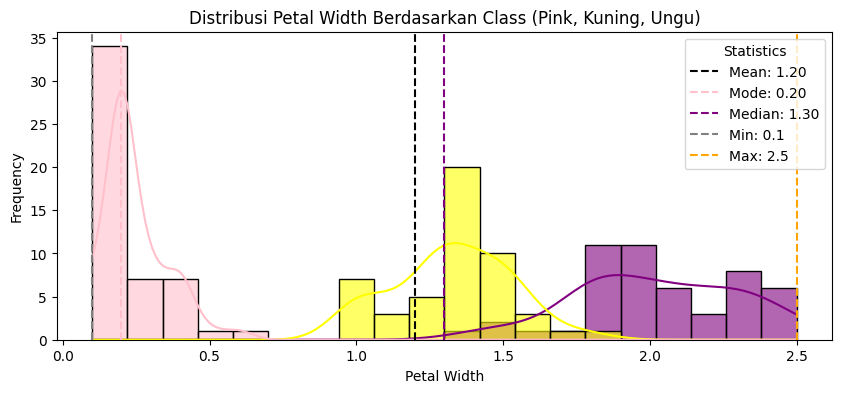

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pastikan nama kolom benar
sepal_length_col = "petal width"  # Sesuaikan dengan nama kolom yang benar
class_col = "class"  # Sesuaikan dengan nama kolom yang benar

# Tetapkan warna khusus untuk setiap class
custom_palette = {
    "Iris-setosa": "pink",
    "Iris-versicolor": "yellow",
    "Iris-virginica": "purple"
}

# Hitung statistik dasar
mean_sepal_length = combined_df[sepal_length_col].mean()
median_sepal_length = combined_df[sepal_length_col].median()
min_sepal_length = combined_df[sepal_length_col].min()
max_sepal_length = combined_df[sepal_length_col].max()
mode_sepal_length = combined_df[sepal_length_col].mode()[0]

# Buat plot distribusi dengan warna yang sudah ditentukan
plt.figure(figsize=(10, 4))
sns.histplot(data=combined_df, x=sepal_length_col, hue=class_col, bins=20, kde=True, alpha=0.6, palette=custom_palette)

# Tambahkan garis rata-rata, median, min, dan max
plt.axvline(mean_sepal_length, color="black", linestyle="--", label=f"Mean: {mean_sepal_length:.2f}")
plt.axvline(mode_sepal_length, color="pink", linestyle="--", label=f"Mode: {mode_sepal_length:.2f}")
plt.axvline(median_sepal_length, color="purple", linestyle="--", label=f"Median: {median_sepal_length:.2f}")
plt.axvline(min_sepal_length, color="gray", linestyle="--", label=f"Min: {min_sepal_length:.1f}")
plt.axvline(max_sepal_length, color="orange", linestyle="--", label=f"Max: {max_sepal_length:.1f}")

# Tambahkan label
plt.xlabel("Petal Width")
plt.ylabel("Frequency")
plt.title("Distribusi Petal Width Berdasarkan Class (Pink, Kuning, Ungu)")
plt.legend(title="Statistics")

# Tampilkan plot
plt.show()


## Indentifikasi Masalah Data

Identifikasi masalah data adalah langkah penting dalam memastikan bahwa data yang digunakan untuk analisis atau model machine learning memiliki kualitas yang baik, akurat, dan sesuai dengan standar yang diharapkan. Proses ini bertujuan untuk mendeteksi dan mengatasi berbagai permasalahan dalam dataset, seperti:

- Missing Values: Mengidentifikasi dan menangani data yang hilang agar tidak memengaruhi hasil analisis.
- Outliers: Menganalisis nilai ekstrem yang dapat mengganggu distribusi data atau menunjukkan anomali.
- Duplikasi Data: Menemukan dan menghapus data ganda yang dapat menyebabkan bias dalam analisis.
- Inkonsistensi: Memastikan keseragaman dalam format dan nilai data untuk menjaga validitas hasil analisis.

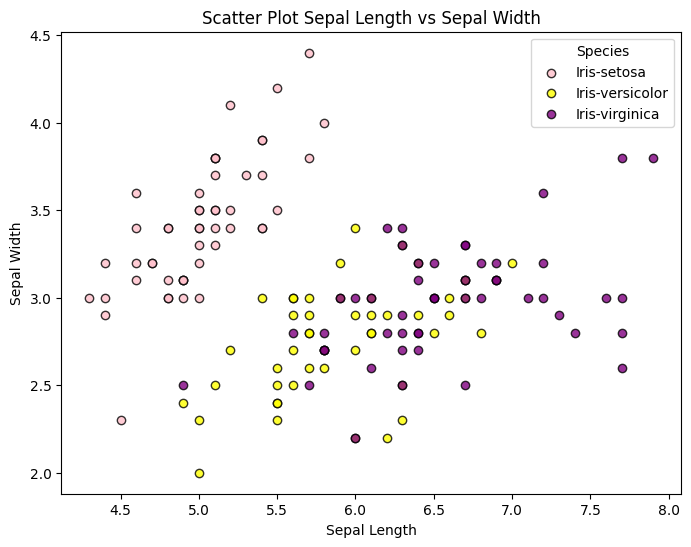

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pastikan nama kolom sesuai
x_col = "sepal length"
y_col = "sepal width"
class_col = "class"

# Warna sesuai dengan gambar yang diberikan
colors = {"Iris-setosa": "pink", "Iris-versicolor": "yellow", "Iris-virginica": "purple"}

plt.figure(figsize=(8, 6))

# Scatter plot dengan warna berdasarkan kelas
for species, color in colors.items():
    subset = combined_df[combined_df[class_col] == species]
    plt.scatter(subset[x_col], subset[y_col], label=species, color=color, alpha=0.8, edgecolors="black")

# Label sumbu
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Scatter Plot Sepal Length vs Sepal Width")

# Tambahkan legenda
plt.legend(title="Species")

# Tampilkan plot
plt.show()


## Validasi data

Validasi data adalah proses untuk memastikan bahwa data yang digunakan akurat, lengkap, dan sesuai sebelum dianalisis atau divisualisasikan. Langkah ini bertujuan untuk memverifikasi apakah data mencerminkan realitas atau fenomena yang ingin dipelajari, sehingga hasil analisis menjadi lebih valid dan dapat diandalkan.